## UCL 2020-21 Analysis

### Objective

To determine the **strength** and **weakness** of any Football(soccer) Club.

In [2]:
#Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#reading data by using attacking.csv file with the help of pandas#
attacking_data = pd.read_csv("../Datasets/ucl 2021-22 data/attacking.csv")

In [4]:
attacking_data.head()

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9


In [5]:
#reading statistics data such as goals,assists etc#
key_stats_data = pd.read_csv("../Datasets/ucl 2021-22 data/key_stats.csv")

In [6]:
key_stats_data.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


In [7]:
#filtering only strikers(forwards) data from attacking_data.#
only_attack = attacking_data.loc[(attacking_data.position == 'Forward')]
only_attack

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
3,4,Antony,Ajax,Forward,5,3,4,28,7
8,5,Mbappé,Paris,Forward,4,4,8,43,8
9,5,Gerard Moreno,Villarreal,Forward,4,0,3,9,7
13,12,Müller,Bayern,Forward,3,10,8,2,10
16,12,Coman,Bayern,Forward,3,4,4,59,9
19,12,Zapata,Atalanta,Forward,3,0,7,10,6
20,12,Lewandowski,Bayern,Forward,3,0,7,1,10
30,24,Forsberg,Leipzig,Forward,2,9,0,3,6
37,24,Tadić,Ajax,Forward,2,5,5,13,7


In [8]:
#filtering and selecting key_statistics data of strikers(forwards)#
attack_key_stats = key_stats_data.loc[key_stats_data.position == 'Forward']
attack_key_stats

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
12,Rodrygo,Real Madrid,Forward,505,11,5,2,65.7
15,Asensio,Real Madrid,Forward,207,8,1,2,28.4
16,Jović,Real Madrid,Forward,113,3,0,0,12.9
...,...,...,...,...,...,...,...,...
729,Šimić,Salzburg,Forward,4,1,0,0,1.3
735,Kuznetsov,Zenit,Forward,3,1,0,0,0.9
737,Ginczek,Wolfsburg,Forward,2,1,0,0,1.1
740,Da Graca,Juventus,Forward,1,1,0,0,0.8


In [9]:
#joining both only_attack data and key_statistics data of strikers#
left = only_attack.set_index(['player_name'])
right = attack_key_stats.set_index(['player_name'])
new_data = left.join(right,lsuffix='_att',rsuffix='_player')

In [12]:
new_data

,serial,club_att,position_att,assists_att,corner_taken,offsides,dribbles,match_played_att,club_player,position_player,minutes_played,match_played_player,goals,assists_player,distance_covered
player_name,,,,,,,,,,,,,,,
Adeyemi,64,Salzburg,Forward,1,0,0,23,8,Salzburg,Forward,607,8,3,1,69.2
Al. Miranchuk,64,Atalanta,Forward,1,0,0,2,2,Atalanta,Forward,33,2,0,1,4.8
Alexis Sánchez,64,Inter,Forward,1,0,3,2,6,Inter,Forward,155,6,1,1,19
André Silva,24,Leipzig,Forward,2,0,9,5,6,Leipzig,Forward,410,6,3,2,47.2
Antony,4,Ajax,Forward,5,3,4,28,7,Ajax,Forward,577,7,2,5,65.1
Asensio,24,Real Madrid,Forward,2,5,0,1,8,Real Madrid,Forward,207,8,1,2,28.4
Azmoun,64,Zenit,Forward,1,0,1,2,5,Zenit,Forward,303,5,2,1,30.3
Benzema,64,Real Madrid,Forward,1,2,9,18,12,Real Madrid,Forward,1106,12,15,1,121.5
Berghuis,64,Ajax,Forward,1,15,2,3,8,Ajax,Forward,628,8,3,1,79.8


Here we'll be plotting bar graph to analyze average number of goals scored by different teams.

Text(0, 0.5, 'clubs')

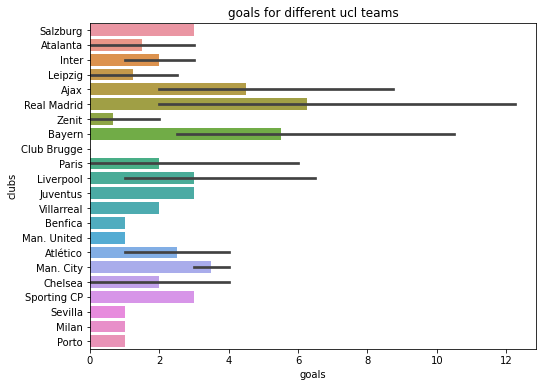

In [35]:

plt.figure(figsize=(8,6))
plt.title('goals for different ucl teams')
sns.barplot(x=new_data.goals, y=new_data.club_att)
plt.xlabel('goals')
plt.ylabel('clubs')



plotting bar graph for average number of assists for by various teams.

Text(0, 0.5, 'clubs')

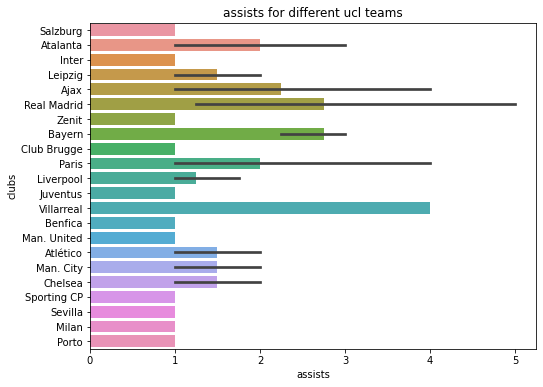

In [36]:

plt.figure(figsize=(8,6))
plt.title('assists for different ucl teams')
sns.barplot(x=new_data.assists_player, y=new_data.club_att)
plt.xlabel('assists')
plt.ylabel('clubs')


In [37]:
#reading data by using defending.csv file with the help of pandas#
deffense_data=pd.read_csv("../Datasets/ucl 2021-22 data/defending.csv")

In [38]:
deffense_data


,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12
...,...,...,...,...,...,...,...,...,...,...
622,578,Maier,Young Boys,Midfielder,1,0,0,0,0,1
623,578,Zhegrova,LOSC,Midfielder,1,0,0,0,0,1
624,578,Zesiger,Young Boys,Defender,1,0,0,0,0,1
625,578,Zakaria,Juventus,Midfielder,1,0,0,0,0,1


In [39]:
#filtering only defenders data from deffense_data.#
only_deffense = deffense_data.loc[deffense_data.position == 'Defender']
only_deffense

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12
5,6,Thiago Silva,Chelsea,Defender,65,9,4,5,17,9
6,7,Otamendi,Benfica,Defender,63,28,17,11,48,9
...,...,...,...,...,...,...,...,...,...,...
591,578,Bradarić,LOSC,Defender,1,1,0,1,1,1
597,578,Miguel Gutiérrez,Real Madrid,Defender,1,1,0,1,0,1
602,578,Mario Gaspar,Villarreal,Defender,1,0,0,0,2,2
608,578,Julien,Sheriff,Defender,1,0,0,0,0,3


In [40]:
#filtering only Real Madrid's deffender's data#
new_data_2 = only_deffense.loc[only_deffense.club =='Real Madrid']

In [41]:
new_data_2

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
20,21,Carvajal,Real Madrid,Defender,50,12,6,6,30,11
22,22,Alaba,Real Madrid,Defender,49,18,12,6,28,12
72,70,Mendy,Real Madrid,Defender,36,6,5,1,15,10
140,138,Nacho,Real Madrid,Defender,27,10,4,6,14,9
502,479,Marcelo,Real Madrid,Defender,4,0,0,0,3,3
567,543,Vallejo,Real Madrid,Defender,2,0,0,0,2,2
597,578,Miguel Gutiérrez,Real Madrid,Defender,1,1,0,1,0,1


Now we'll plot some of the deffender's data that are associated with Real Madrid Club.

<AxesSubplot:xlabel='match_played', ylabel='balls_recoverd'>

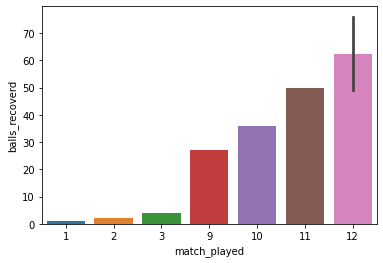

In [42]:
#Balls Recovered by deffenders#
plt.figure(figsize=(6,4))
sns.barplot(x=new_data_2.match_played, y=new_data_2.balls_recoverd)

<AxesSubplot:xlabel='tackles', ylabel='t_won'>

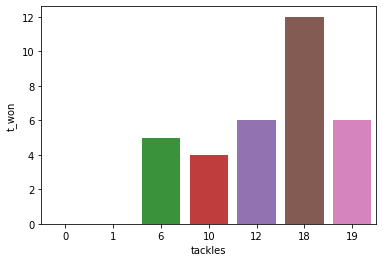

In [43]:
#tackles won by deffenders#
sns.barplot(x=new_data_2.tackles, y=new_data_2.t_won)

<AxesSubplot:xlabel='match_played', ylabel='clearance_attempted'>

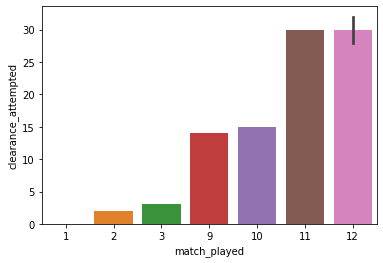

In [44]:
#clearance attempted by deffenders#
sns.barplot(x=new_data_2.match_played, y=new_data_2.clearance_attempted)

In [45]:
#reading data by using distribution.csv file with the help of pandas#
midfield_data = pd.read_csv("../Datasets/ucl 2021-22 data/distributon.csv")
midfield_data

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8
...,...,...,...,...,...,...,...,...,...,...,...,...
603,604,Phillips,Liverpool,Defender,44.5,37,33,0,0,0,1,2
604,605,Philipp,Wolfsburg,Forward,44.0,9,7,0,0,0,1,2
605,606,Brobbey,Leipzig,Forward,42.6,23,13,0,2,0,0,5
606,607,Traoré,Shakhtar Donetsk,Forward,36.5,22,16,0,0,0,0,2


In [46]:

#filtering only defenders data from midfield_data.#
only_midfield = midfield_data.loc[midfield_data.position == 'Midfielder']

In [47]:
only_midfield

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8
10,11,Maycon,Shakhtar Donetsk,Midfielder,94.5,395,373,58,12,7,9,6
11,11,Nianzou,Bayern,Midfielder,94.5,199,192,0,0,0,5,4
12,13,Marcos Antônio,Shakhtar Donetsk,Midfielder,94.4,234,224,0,0,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
585,586,Milner,Liverpool,Midfielder,57.5,157,116,22,9,2,7,8
588,589,Mata,Man. United,Midfielder,57.0,55,47,0,2,0,4,3
593,594,Lázaro,Benfica,Midfielder,54.0,47,38,0,0,0,2,6
599,600,Okafor,Salzburg,Midfielder,51.0,80,51,0,4,0,0,6


In [48]:
#filtering only Real Madrid's midfielder's data#
new_data_3 = only_midfield.loc[only_midfield.club =='Real Madrid']

In [49]:
new_data_3

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
52,53,Kroos,Real Madrid,Midfielder,91.9,814,752,20,34,7,44,12
105,106,Modrić,Real Madrid,Midfielder,89.8,799,723,25,12,3,26,13
123,123,Casemiro,Real Madrid,Midfielder,89.1,538,482,25,4,1,6,11
154,155,Camavinga,Real Madrid,Midfielder,87.7,179,158,0,1,0,7,10
233,232,Valverde,Real Madrid,Midfielder,85.4,395,336,20,15,3,1,11
287,287,Lucas Vázquez,Real Madrid,Midfielder,83.6,239,207,25,12,3,2,8


Now we'll plot some of the midfielder's data that are associated with Real Madrid Club.

<AxesSubplot:xlabel='match_played', ylabel='pass_accuracy'>

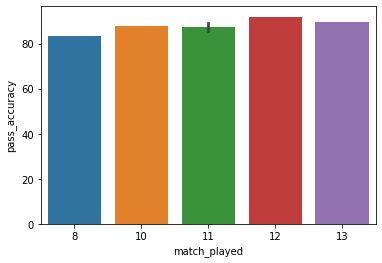

In [50]:
#Pass Accuracy#
plt.figure(figsize=(6,4))
sns.barplot(x=new_data_3.match_played, y=new_data_3.pass_accuracy)

<AxesSubplot:xlabel='match_played', ylabel='cross_accuracy'>

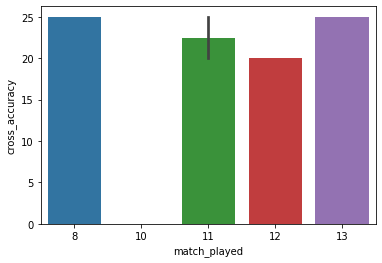

In [51]:
#Cross Accuracy#
sns.barplot(x=new_data_3.match_played, y=new_data_3.cross_accuracy)

In [52]:
#reading statistics data such as goals,assists etc of midfielder's#
midfield_key_stats = key_stats_data.loc[key_stats_data.position == 'Midfielder']
midfield_key_stats

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
7,Casemiro,Real Madrid,Midfielder,914,11,0,0,107.6
8,Kroos,Real Madrid,Midfielder,902,12,2,0,116.5
10,Valverde,Real Madrid,Midfielder,804,11,0,1,96.7
13,Lucas Vázquez,Real Madrid,Midfielder,349,8,0,1,47.4
...,...,...,...,...,...,...,...,...
733,Maier,Young Boys,Midfielder,3,1,0,0,1.3
738,Savage,Man. United,Midfielder,1,1,0,0,1
739,Iqbal,Man. United,Midfielder,1,1,0,0,1
741,Miretti,Juventus,Midfielder,1,1,0,0,0.8


In [53]:
#Merging only_Midfield data table and key_stats table#
left = only_midfield.set_index(['player_name'])
right = midfield_key_stats.set_index(['player_name'])
new_data_4 = left.join(right,lsuffix='_mid',rsuffix='_player')

In [54]:
new_data_4

,serial,club_mid,position_mid,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played_mid,club_player,position_player,minutes_played,match_played_player,goals,assists,distance_covered
player_name,,,,,,,,,,,,,,,,,,
Aaronson,456,Salzburg,Midfielder,76.1,239,181,27,18,5,4,8,Salzburg,Midfielder,715,8,0,2,103.5
Adams,118,Leipzig,Midfielder,89.4,166,146,0,1,0,0,5,Leipzig,Midfielder,292,5,0,0,38.9
Addo,240,Sheriff,Midfielder,85.2,137,118,0,0,0,2,6,Sheriff,Midfielder,491,6,0,0,59.7
Aebischer,228,Young Boys,Midfielder,85.5,272,235,47,21,10,3,6,Young Boys,Midfielder,504,6,0,1,53.9
Alan Patrick,343,Shakhtar Donetsk,Midfielder,81.3,153,127,50,4,2,4,4,Shakhtar Donetsk,Midfielder,268,4,0,1,37.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wolf,562,Dortmund,Midfielder,65.2,66,50,25,8,2,0,5,Dortmund,Midfielder,170,5,0,0,24.3
Xeka,376,LOSC,Midfielder,80.3,218,180,33,9,3,16,7,LOSC,Midfielder,435,7,0,0,54.1
Ziyech,446,Chelsea,Midfielder,76.8,240,186,26,41,11,3,9,Chelsea,Midfielder,446,9,1,2,53.5


Here we'll be plotting bar graph to analyze average number of goals scored by different teams midfielder's.

Text(0, 0.5, 'clubs')

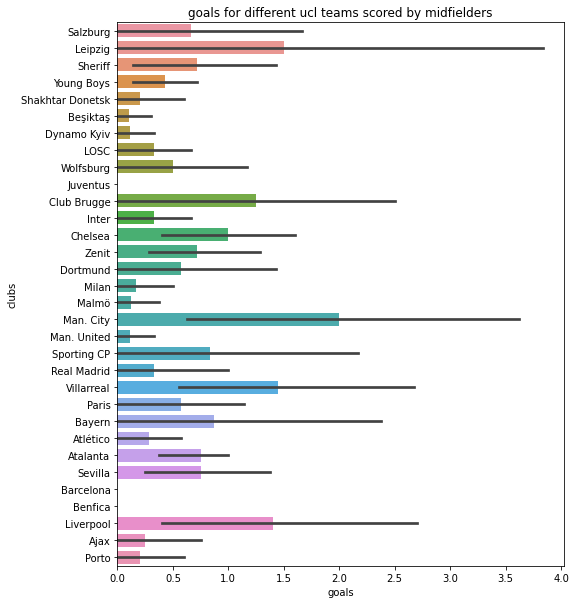

In [55]:
plt.figure(figsize=(8,10))
plt.title('goals for different ucl teams scored by midfielders')
sns.barplot(x=new_data_4.goals, y=new_data_4.club_mid)
plt.xlabel('goals')
plt.ylabel('clubs')

Here we wi'll be plotting bar graph to analyze average number of assists provided by different teams.

Text(0, 0.5, 'clubs')

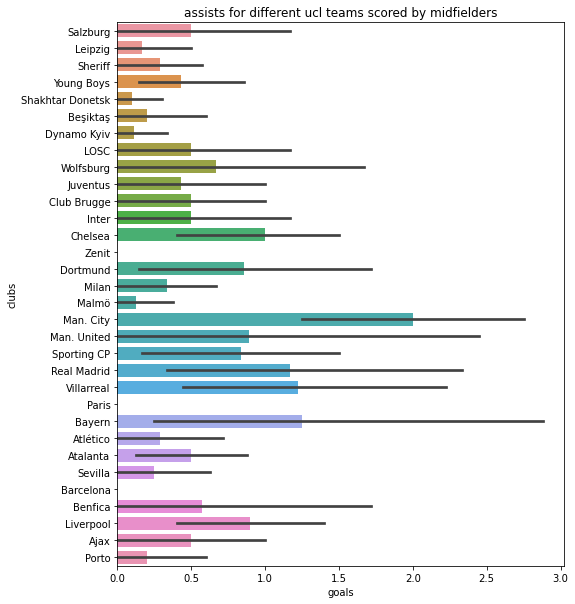

In [65]:
plt.figure(figsize=(8,10))
plt.title('assists for different ucl teams provided by midfielders')
sns.barplot(x=new_data_4.assists, y=new_data_4.club_mid)
plt.xlabel('goals')
plt.ylabel('clubs')

In [66]:
#fetching goalkeeper's data from goalkeeping.csv#
goalkeeping_data = pd.read_csv("../Datasets/ucl 2021-22 data/goalkeeping.csv")

In [67]:
goalkeeping_data

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6
5,6,Oblak,Atlético,Goalkeeper,26,10,0,3,2,10
6,7,Musso,Atalanta,Goalkeeper,21,13,0,1,1,6
7,8,Ersin Destanoğlu,Beşiktaş,Goalkeeper,20,17,0,0,0,5
8,9,De Gea,Man. United,Goalkeeper,19,9,0,1,0,7
9,9,Dahlin,Malmö,Goalkeeper,19,8,1,0,3,4


In [68]:
#filtering Real madrid's goalkeeper data#
new_data_5 = goalkeeping_data.loc[goalkeeping_data.club == "Real Madrid"]

In [69]:
new_data_5

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13


In [70]:
row = goalkeeping_data.iloc[0]

In [71]:
row

serial                       1
player_name           Courtois
club               Real Madrid
position            Goalkeeper
saved                       61
conceded                    14
saved_penalties              1
cleansheets                  5
punches made                 4
match_played                13
Name: 0, dtype: object

Here we'll be plotting bar graph to analyze average number of goals saved by various teams goalkeeper.

Text(0, 0.5, 'clubs')

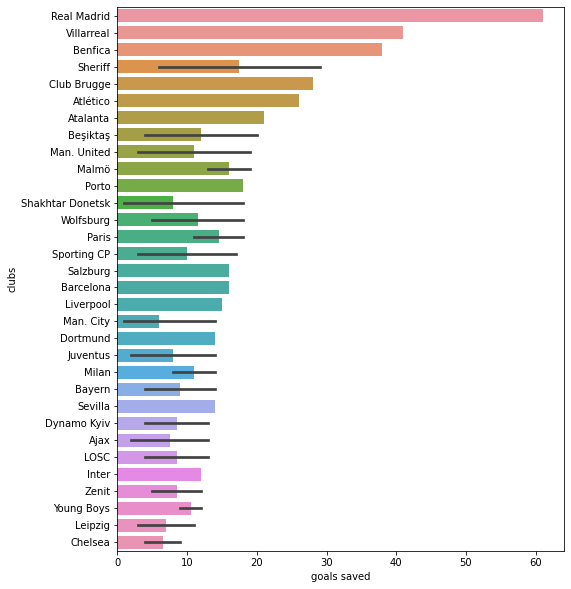

In [73]:
plt.figure(figsize=(8,10))
sns.barplot(x=goalkeeping_data.saved, y=goalkeeping_data.club)
plt.xlabel('goals saved')
plt.ylabel('clubs')

### Conclusion


By looking at the graphs specifically of Real Madrid it appears that that real madrid strikers are the best in scoring goals and their midfielders are very effective also. Real Madrid deffenders performance also looks reliable and appears one of the best.
But the trump card for real madrids team was their goalkeeper courtois, who was well ahead of his rival goalkeepers throughout the tournament.

In [5]:
l = ['a','b','c']
t={}
for i in l:
    t[i] = 0
print(t)
    


{'a': 0, 'b': 0, 'c': 0}


In [20]:
r = ['a','h','b']
r.sort()
r

['a', 'b', 'h']

In [56]:
w=['sun','mon','tue','thu','sun','wed','mon']
w.sort()
count = 1
a = []
for i in range(len(w)-1):
    if w[i] == w[i+1]:
        count += 1
    elif w[i] != w[i+1]:
        a.append(w[i])
        a.append(count)
        count = 1

    
    
    
    
    
    

In [57]:
print(a)

['mon', 2, 'sun', 2, 'thu', 1, 'tue', 1]


In [37]:
def func():
    wd=['sun','mon','tue','thu','sun','wed','mon']

    for i in wd:
        d[i] = 0


    for day in wd:
        if d[day] < 0:
            d.add(day)
        else:
            d[day] = d[day] + 1
    return d
    

In [38]:
d

{'sun': 2, 'mon': 2, 'tue': 1, 'thu': 1, 'wed': 1}